In [24]:
### ATOC7500 Lecture #5 - estimate_effective_sample_size
### coded by Prof. Jennifer Kay (University of Colorado)
### last updated September 16, 2020
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats

In [69]:
filename = 'ATOC_wxobs20200907-20200908.csv'
data=pd.read_csv(filename,sep=',')
data

,Date,Time,Temp_F,RH_percent,DewTemp_F,WindSpeed_mph,SLP_mb
0,9/6/20,12:05a,78.2,15,26.7,13,841.7
1,9/6/20,12:10a,78.2,15,26.7,12,841.7
2,9/6/20,12:15a,78.1,15,26.7,13,841.7
3,9/6/20,12:20a,78.1,14,25.0,14,841.7
4,9/6/20,12:25a,78.2,15,26.7,14,841.6
...,...,...,...,...,...,...,...
1145,9/8/20,11:35p,31.8,95,30.5,0,846.7
1146,9/8/20,11:40p,31.9,95,30.6,0,846.5
1147,9/8/20,11:45p,31.9,95,30.6,0,846.7
1148,9/8/20,11:50p,31.9,95,30.6,0,846.5


In [73]:
## Look at data
foo=data['DewTemp_F']
Nhrs=3 ## sampling rate in hours
tseries=foo[::24*Nhrs] ## take the temperature every sampling every Nhrs
hours=np.arange(0,48,Nhrs*1.)
print(tseries)
print(hours)
print(12*5)

0       26.7
72      35.2
144     31.3
216     47.1
288     31.3
360     38.5
432     43.8
504     41.4
576     31.6
648     38.8
720     42.6
792     42.8
864     42.2
936     33.2
1008    32.3
1080    30.7
Name: DewTemp_F, dtype: float64
[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45.]
60


Sample Size N= 16
Mean Temperature 36.8
Standard Deviation in Temperature 5.8


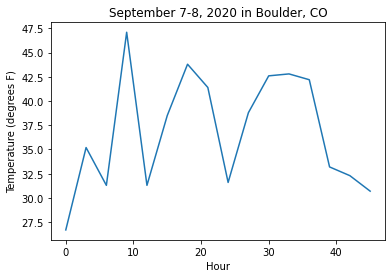

In [74]:
plt.plot(hours,tseries)
plt.title('September 7-8, 2020 in Boulder, CO')
plt.ylabel('Temperature (degrees F)')
plt.xlabel('Hour')
N=len(tseries)
sigma=np.std(tseries)  ## calculate the standard deviation
mean=np.mean(tseries)  ## calculate the mean
print('Sample Size N=',N)
print('Mean Temperature',round(mean,1))
print('Standard Deviation in Temperature',round(sigma,1))

In [75]:
## Estimate lag-1 autocorrelation
lag=1
t1_m=tseries[0:-1*lag]-mean
t2_m=tseries[lag:]-mean

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
AR1_np=np.correlate(t1_m,t2_m,mode='valid')/(N-lag)/(sigma**2)
print('np.correlate AR1:',round(AR1_np[0],5))

#Method #2 - direct calculation
#Calculate the autocorrelation using numpy dot
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
AR1=np.dot(t1_m,t2_m)/(N-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print('direct calculation AR1:',round(AR1,5))

np.correlate AR1: 0.02813
direct calculation AR1: 0.02813


In [62]:
## Calculate effective sample size
Nstar_wilks=round(((1-AR1)/(1+AR1))*N) ## Barnes Chapter 2 eq. 88
Nstar_leith=round((-0.5*np.log(AR1))*N) ## Barnes Chapter 2 eq. 90
print('Sample Size:',N)
print('Effective Sample Size Wilks (#independent samples):',Nstar_wilks)
print('Effective Sample Size Leith (#independent samples):',Nstar_leith)

Sample Size: 8
Effective Sample Size Wilks (#independent samples): 3
Effective Sample Size Leith (#independent samples): 4
